In [1]:
import numpy as np 
import pandas as pd 



In [2]:
df=pd.read_csv("ETHUSD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [3]:
df.shape

(2267, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2.262000e+03
mean,504.643794,523.874192,483.580502,506.243005,506.243005,7.651589e+09
std,815.447289,847.466491,780.110901,818.223291,818.223291,1.082828e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,15.396625,15.939850,14.291450,15.483300,15.483300,5.144278e+07
50%,208.800750,213.967026,202.311622,208.977218,208.977218,2.423995e+09
75%,447.946007,465.080513,431.290749,449.149490,449.149490,1.104452e+10
max,4174.635742,4362.350586,3868.994385,4168.701172,4168.701172,8.448291e+10


In [5]:
df.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [6]:
rows_with_NaN = df[df.isnull().any(axis=1)]
print(f'Data : \n{rows_with_NaN}')
print(f'\nSize : {len(rows_with_NaN)}')

Data : 
            Date  Open  High  Low  Close  Adj Close  Volume
1715  2020-04-17   NaN   NaN  NaN    NaN        NaN     NaN
1890  2020-10-09   NaN   NaN  NaN    NaN        NaN     NaN
1893  2020-10-12   NaN   NaN  NaN    NaN        NaN     NaN
1894  2020-10-13   NaN   NaN  NaN    NaN        NaN     NaN
2265  2021-10-19   NaN   NaN  NaN    NaN        NaN     NaN

Size : 5


In [7]:
columns = list(df.columns)[1:]
print(columns)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [8]:
for column in columns:
    if(df[column].isnull().sum() > 0):
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        pass

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Adj Close', ylabel='Count'>

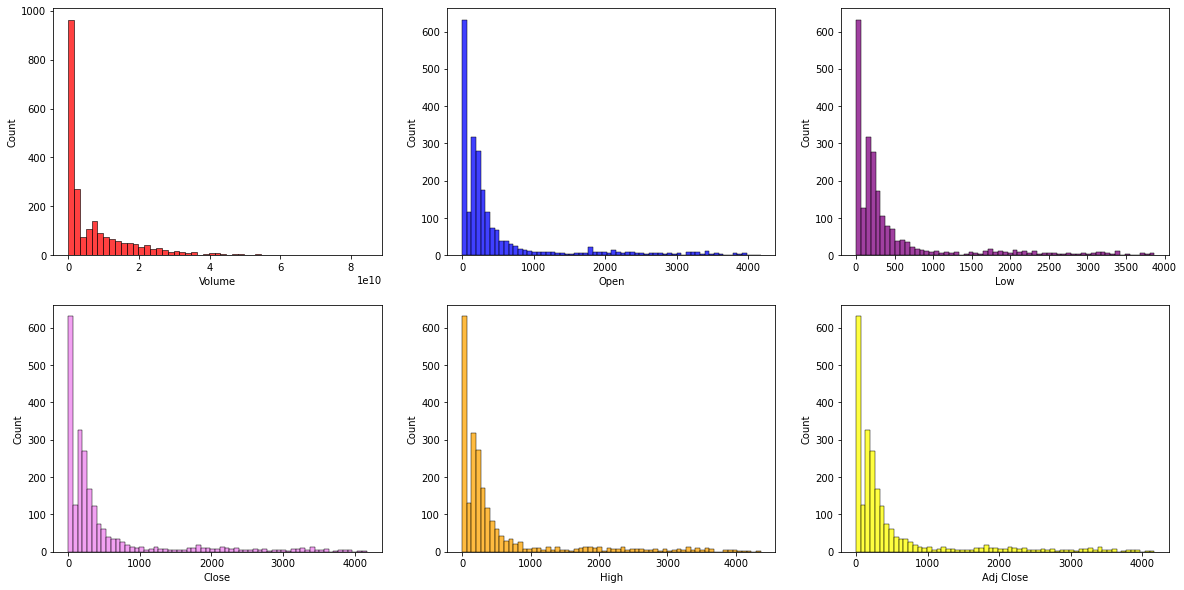

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sb.histplot(x=df.Volume,data=df, color='red')

plt.subplot(2,3,2)
sb.histplot(x=df.Open,data=df, color='blue')

plt.subplot(2,3,3)
sb.histplot(x=df.Low,data=df, color='purple')

plt.subplot(2,3,4)
sb.histplot(x=df.Close,data=df, color='violet')

plt.subplot(2,3,5)
sb.histplot(x=df.High,data=df, color='orange')

plt.subplot(2,3,6)
sb.histplot(x=df['Adj Close'],data=df, color='yellow')

In [11]:
for column in columns:
    print(f'{column} : {df[column].skew()}')

Open : 2.45445268939209
High : 2.4441756393610774
Low : 2.468937465204794
Close : 2.4511678979682254
Adj Close : 2.4511678979682254
Volume : 2.1852477132468007


In [12]:
df_normalized = np.log(df.iloc[:,1:])

<AxesSubplot:xlabel='Adj Close', ylabel='Count'>

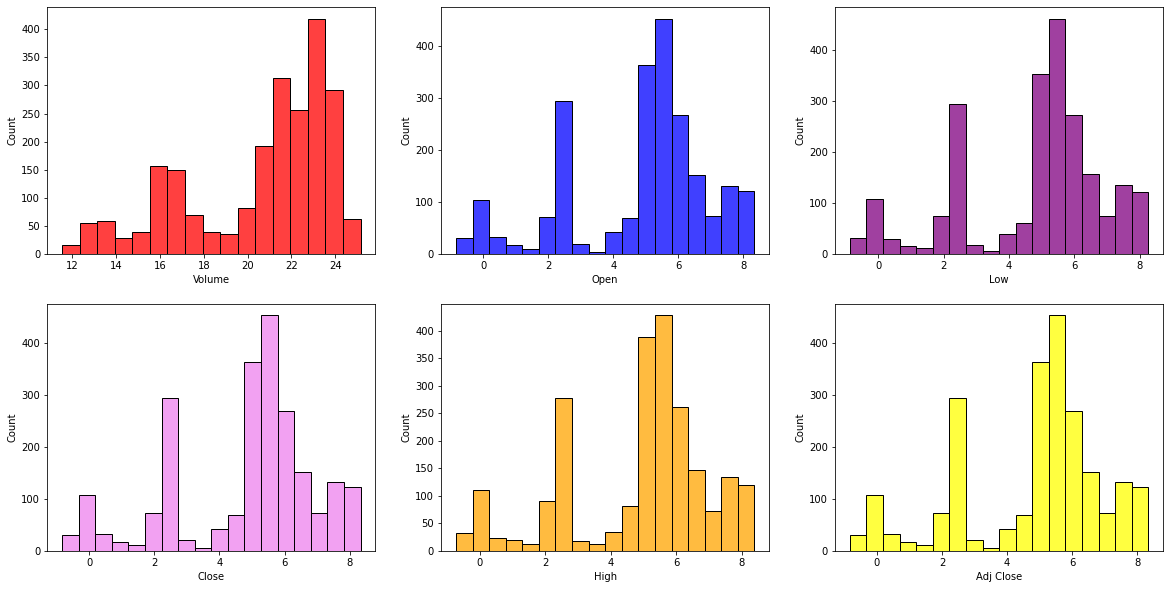

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sb.histplot(x=df_normalized.Volume,data=df_normalized, color='red')

plt.subplot(2,3,2)
sb.histplot(x=df_normalized.Open,data=df_normalized, color='blue')

plt.subplot(2,3,3)
sb.histplot(x=df_normalized.Low,data=df_normalized, color='purple')

plt.subplot(2,3,4)
sb.histplot(x=df_normalized.Close,data=df_normalized, color='violet')

plt.subplot(2,3,5)
sb.histplot(x=df_normalized.High,data=df_normalized, color='orange')

plt.subplot(2,3,6)
sb.histplot(x=df_normalized['Adj Close'],data=df_normalized, color='yellow')

In [14]:
correlation = df_normalized.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999771,0.999636,0.999518,0.999518,0.921486
High,0.999771,1.000000,0.999503,0.999748,0.999748,0.922059
Low,0.999636,0.999503,1.000000,0.999760,0.999760,0.921310
Close,0.999518,0.999748,0.999760,1.000000,1.000000,0.921909
Adj Close,0.999518,0.999748,0.999760,1.000000,1.000000,0.921909
Volume,0.921486,0.922059,0.921310,0.921909,0.921909,1.000000


<AxesSubplot:>

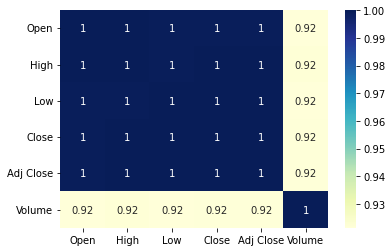

In [15]:
sb.heatmap(correlation, cmap="YlGnBu", annot=True)

In [16]:
x=df_normalized.drop(columns='Volume')
y=df_normalized.Volume

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [18]:
model.score(x,y)

0.8505316703701173

In [19]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=10)
model1.fit(x,y)

RandomForestRegressor(n_estimators=10)

In [20]:
model1.score(x,y)

0.9879062833942168